<a href="https://colab.research.google.com/github/ludimilla23/Exercicios_python/blob/main/TrabalhoP%C3%B3sIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
files.upload()
df_dengue =  pd.read_csv('arq_dengue.csv', delimiter=';')
df_dengue.head()

Saving arq_dengue.csv to arq_dengue.csv


,paciente,febre,dor_muscular,falta_apetite,manchas_vermelhas,dengue
0,1,38.6,sim,sim,sim,sim
1,2,36.4,nao,nao,nao,nao
2,3,37.5,sim,sim,nao,sim
3,4,38.9,sim,sim,sim,sim
4,5,39.3,sim,sim,sim,sim


In [3]:
df_dengue = df_dengue.replace({'sim': 1, 'nao': 0})
df_dengue.head()

,paciente,febre,dor_muscular,falta_apetite,manchas_vermelhas,dengue
0,1,38.6,1,1,1,1
1,2,36.4,0,0,0,0
2,3,37.5,1,1,0,1
3,4,38.9,1,1,1,1
4,5,39.3,1,1,1,1


In [4]:
X = df_dengue.drop(columns=['dengue'])
y = df_dengue['dengue']

# Dividir os dados em conjuntos de treinamento e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Passo 4: Selecionar o algoritmo KNeighborsClassifier() e treinar o modelo
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors define o número de vizinhos
knn.fit(X_train, y_train)

# Passo 5: Fazer a predição no conjunto de teste
y_pred = knn.predict(X_test)

# Passo 6: Avaliar o modelo
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Matriz de Confusão:
[[1 3]
 [0 2]]
Acurácia do modelo: 50.00%


In [5]:
# Criando um DataFrame para exibir as métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão'],
    'Valor': [accuracy, cm]
})

# Exibindo a tabela
metrics_df


,Métrica,Valor
0,Acurácia,0.5
1,Precisão,"[[1, 3], [0, 2]]"


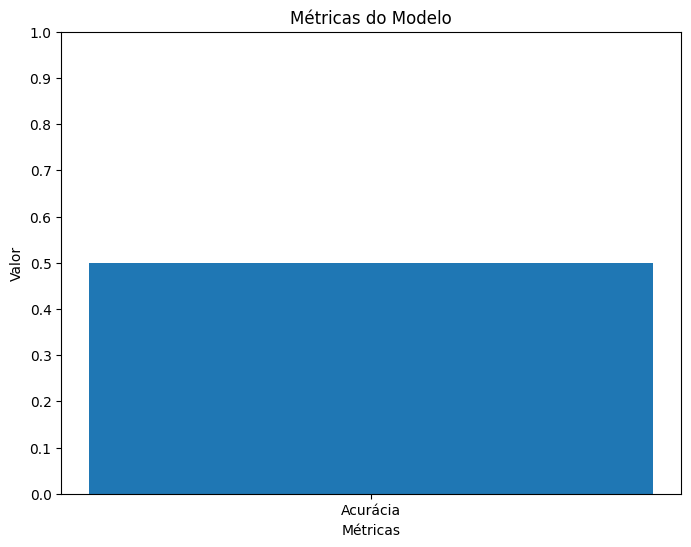

In [6]:
# Filtrar o DataFrame para a métrica 'Acurácia'
acuracia_df = metrics_df[metrics_df['Métrica'] == 'Acurácia']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(acuracia_df['Métrica'], height=acuracia_df['Valor'])
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1)
plt.title('Métricas do Modelo')
plt.show()

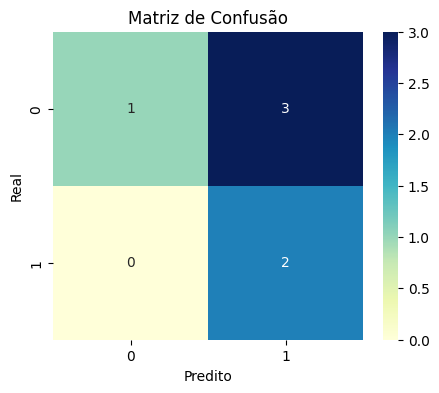

In [7]:
# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão em formato de tabela visual
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
